<a href="https://colab.research.google.com/github/JuniaBS/Exercicios_Analise_de_Dados_com_Python/blob/main/Entendendo_os_estudantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Esse desafio tem como objetivo responder algumas perguntas através da análise de dados, aprofundando o conhecimento em frequência e medidas.

## Este conjunto de dados consiste nas notas obtidas pelos alunos em várias disciplinas e suas informações pessoais.

1. Leia a base de dados e faça uma análise inicial, como por exemplo,
verificar o tamanho da base de dados (quantidade de linhas e
colunas) e o tipo das variáveis.

In [ ]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
 # Carregando dados DF
df_notas_alunos = pd.read_csv('StudentsPerformance.csv')

In [ ]:
# Lendo as primeiras linhas
df_notas_alunos.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# Lendo as últimas linhas
df_notas_alunos.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [ ]:
# Verificando o número de linhas e colunas
df_notas_alunos.shape

(1000, 8)

In [ ]:
# Verificando quais colunas são numéricas e quais categóricas.
df_notas_alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
# Contando os valores ausentes
valores_ausentes = df_notas_alunos.isna().sum()
print(valores_ausentes)

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [ ]:
# Contando as linhas duplicadas
linhas_duplicadas = df_notas_alunos.duplicated().sum()

print(linhas_duplicadas)

0


In [ ]:
df_notas_alunos.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## 2. Alguma variável precisa ser alterada ou criada? Faça as alterações se julgar necessária.

In [ ]:
# Verificar o que mais posso mudar ???????

In [ ]:
# Verificando o nome da colunas
df_notas_alunos.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
# Renomeando coulnas
df_notas_alunos = df_notas_alunos.rename(columns={'gender': 'gênero do aluno', 'race/ethnicity': 'raça/etnia dos alunos',
                                                  'parental level of education': 'grau de escolaridade dos pais', 'lunch': 'tipo de almoço',
                                                  'test preparation course': 'indica se fez curso preparatório', 'math score': 'nota na prova de matemática',
                                                  'reading score': 'nota na prova de leitura', 'writing score': 'nota na prova de escrita'})

In [ ]:
df_notas_alunos.columns

Index(['gênero do aluno', 'raça/etnia dos alunos',
       'grau de escolaridade dos pais', 'tipo de almoço',
       'indica se fez curso preparatório', 'nota na prova de matemática',
       'nota na prova de leitura', 'nota na prova de escrita'],
      dtype='object')

## 3. Verifique a quantidade de alunos em cada grupo racial/étnico.

In [ ]:
df_notas_alunos['raça/etnia dos alunos'].value_counts()

,count
raça/etnia dos alunos,
group C,319
group D,262
group B,190
group E,140
group A,89


## 4. Qual a quantidade de alunos de cada gênero? Existem mais alunos do gênero masculino ou feminino?

In [ ]:
# Contando os valores da coluna 'gênero do aluno'
contagem_genero = df_notas_alunos['gênero do aluno'].value_counts()
contagem_genero

,count
gênero do aluno,
female,518
male,482


In [ ]:
# Obtendo o gênero com a maior contagem
genero_maior = contagem_genero.idxmax()
contagem_maior = contagem_genero.max()

In [ ]:
# Imprimindo o resultado
print(f"O gênero com o maior número de alunos é '{genero_maior}' com {contagem_maior} alunos.")

O gênero com o maior número de alunos é 'female' com 518 alunos.


## 5. Analise as notas de matemática dos alunos de forma mais completa possível.

In [ ]:
df_notas_alunos.describe()

,nota na prova de matemática,nota na prova de leitura,nota na prova de escrita
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
# Calculando a média das notas de matemática
media_matematica = df_notas_alunos['nota na prova de matemática'].mean()

# Exibindo a media
print(f'A média das notas de matemática é {media_matematica}')

A média das notas de matemática é 66.089


In [ ]:
# Calculando a moda das notas de matemática
moda_matematica = df_notas_alunos['nota na prova de matemática'].mode()

# Exibindo a moda
print(f'A moda das notas de matemática é {moda_matematica.values}')

A moda das notas de matemática é [65]


In [ ]:
# Calculando a mediana das notas de matemática
mediana_matematica = df_notas_alunos['nota na prova de matemática'].median()

# Exibindo a mediana
print(f"A mediana das notas de matemática é {mediana_matematica}")

A mediana das notas de matemática é 66.0


In [ ]:
# Calculando a desvio padrão das notas de matemática
desviop_matematica = df_notas_alunos['nota na prova de matemática'].std()

# Exibindo o desvio padrão
print(f'A variância das notas de matemática é {desviop_matematica}')

A variância das notas de matemática é 15.16308009600945


In [ ]:
# Calculando a variância das notas de matemática
vaiancia_matematica = df_notas_alunos['nota na prova de matemática'].var()

# Exibindo a variância
print(f'A variância das notas de matemática é {vaiancia_matematica}')

In [ ]:
# Calculando a Range das notas de matemática
range_matematica = df_notas_alunos['nota na prova de matemática'].max() - df_notas_alunos['nota na prova de matemática'].min()

# Exibindo o Range
print(f'O Range das notas de matemática é {range_matematica}')

O Range das notas de matemática é 100


In [ ]:
# Soma das notas de matemática
df_notas_alunos['nota na prova de matemática'].sum()

66089

In [ ]:
# Contagem das notas de matemática
df_notas_alunos['nota na prova de matemática'].count()

1000

In [ ]:
# Calculando os quartis das notas de matemática
q1 = df_notas_alunos['nota na prova de matemática'].quantile(0.25)
q2 = df_notas_alunos['nota na prova de matemática'].quantile(0.5)
q3 = df_notas_alunos['nota na prova de matemática'].quantile(0.75)

# Exibindo os resultados
print(f"1º Quartil (Q1): {q1}")
print(f"2º Quartil (Q2) ou Mediana: {q2}")
print(f"3º Quartil (Q3): {q3}")

1º Quartil (Q1): 57.0
2º Quartil (Q2) ou Mediana: 66.0
3º Quartil (Q3): 77.0


# Qual a nota média de matemática dos alunos segundo o grau de escolaridade dos pais?

In [ ]:
media_por_escolaridade_mat = df_notas_alunos.groupby('grau de escolaridade dos pais')['nota na prova de matemática'].mean().reset_index()

<ipython-input-130-ba6bad62535c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='grau de escolaridade dos pais', y='nota na prova de matemática', data=media_por_escolaridade_mat, palette='viridis')


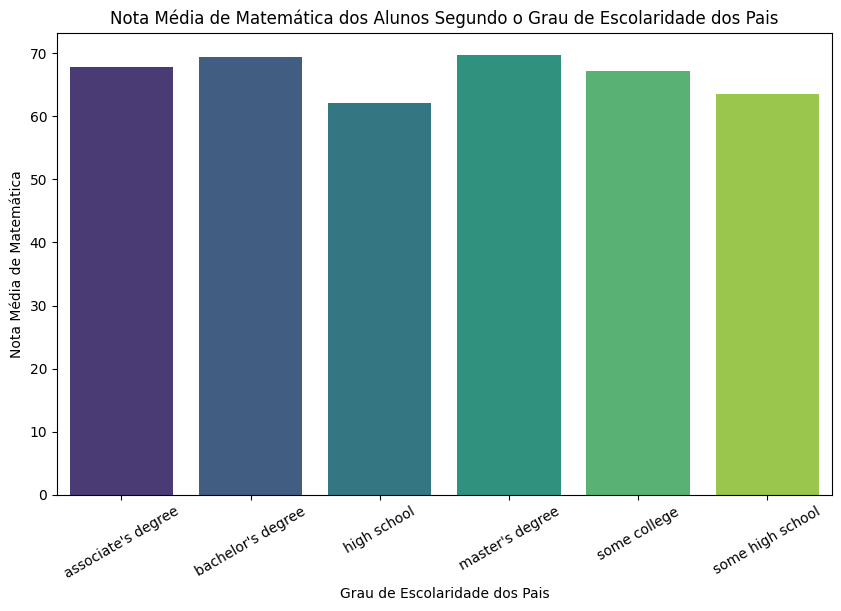

In [ ]:
# Criando o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='grau de escolaridade dos pais', y='nota na prova de matemática', data=media_por_escolaridade_mat, palette='viridis')

# Adicionando títulos e rótulos
plt.title('Nota Média de Matemática dos Alunos Segundo o Grau de Escolaridade dos Pais')
plt.xlabel('Grau de Escolaridade dos Pais')
plt.ylabel('Nota Média de Matemática')
plt.xticks(rotation=30)  # Rotaciona os rótulos do eixo X para melhor visualização

# Exibindo o gráfico
plt.show()

# Faça a mesma análise para as notas de leitura e escrita.

In [ ]:
media_por_escolaridade_lei = df_notas_alunos.groupby('grau de escolaridade dos pais')['nota na prova de leitura'].mean().reset_index()

<ipython-input-137-4b2a21955fc9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='grau de escolaridade dos pais', y='nota na prova de leitura', data=media_por_escolaridade_lei, palette='viridis')


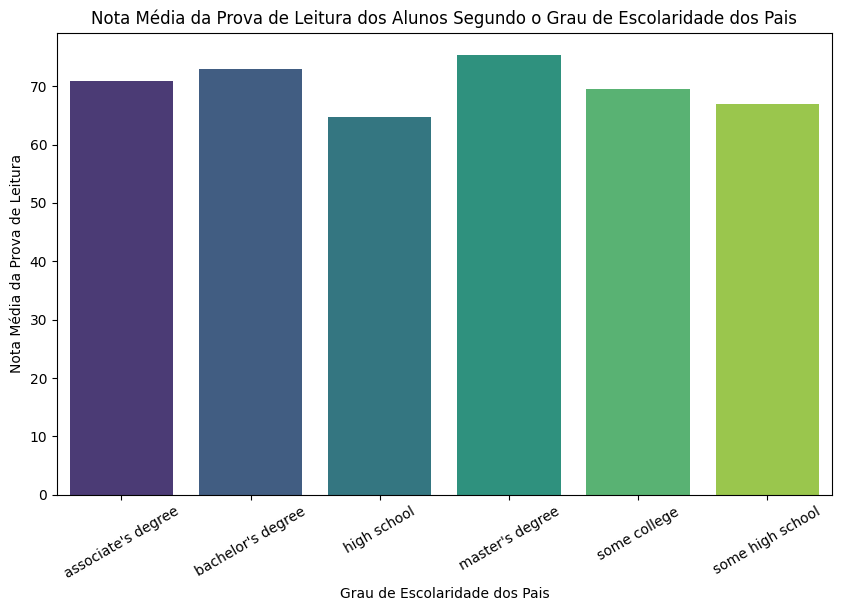

In [ ]:
# Criando o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='grau de escolaridade dos pais', y='nota na prova de leitura', data=media_por_escolaridade_lei, palette='viridis')

# Adicionando títulos e rótulos
plt.title('Nota Média da Prova de Leitura dos Alunos Segundo o Grau de Escolaridade dos Pais')
plt.xlabel('Grau de Escolaridade dos Pais')
plt.ylabel('Nota Média da Prova de Leitura')
plt.xticks(rotation=30)  # Rotaciona os rótulos do eixo X para melhor visualização

# Exibindo o gráfico
plt.show()

In [ ]:
media_por_escolaridade_esc = df_notas_alunos.groupby('grau de escolaridade dos pais')['nota na prova de escrita'].mean().reset_index()

<ipython-input-135-18666bf93c4f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='grau de escolaridade dos pais', y='nota na prova de escrita', data=media_por_escolaridade_esc, palette='viridis')


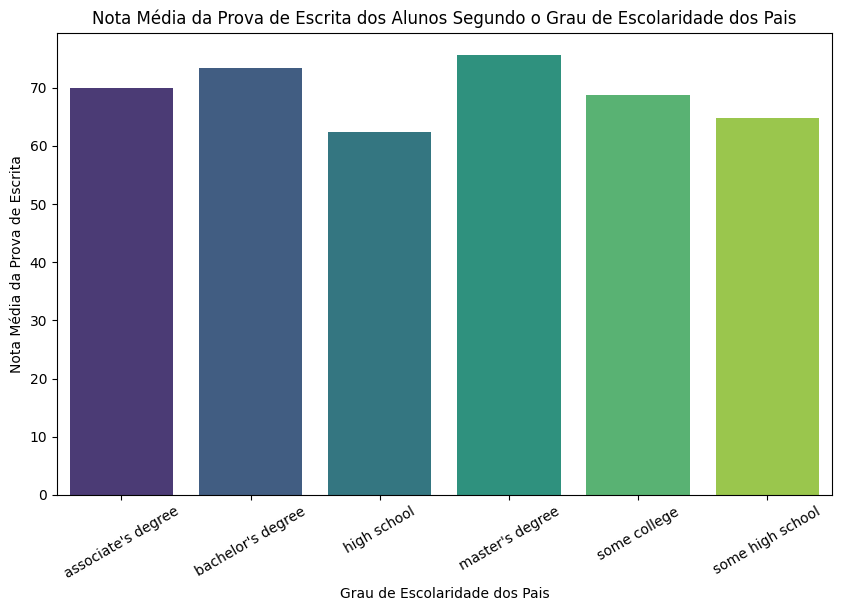

In [ ]:
# Criando o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='grau de escolaridade dos pais', y='nota na prova de escrita', data=media_por_escolaridade_esc, palette='viridis')

# Adicionando títulos e rótulos
plt.title('Nota Média da Prova de Escrita dos Alunos Segundo o Grau de Escolaridade dos Pais')
plt.xlabel('Grau de Escolaridade dos Pais')
plt.ylabel('Nota Média da Prova de Escrita')
plt.xticks(rotation=30)  # Rotaciona os rótulos do eixo X para melhor visualização

# Exibindo o gráfico
plt.show()

# Verifique gráficamente a relação da nota de leitura e de escrita.

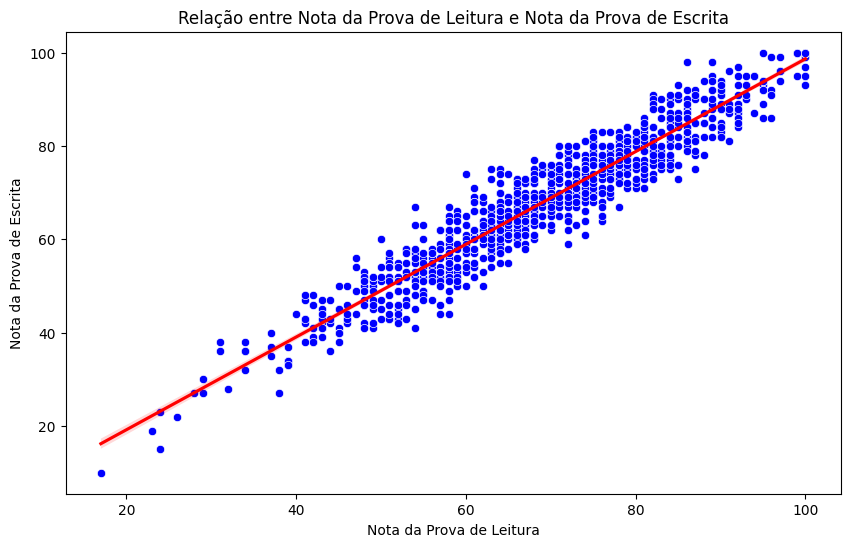

In [ ]:
# Criando o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='nota na prova de leitura', y='nota na prova de escrita', data=df_notas_alunos, marker='o', color='b')

# Adicionando linha de tendência
sns.regplot(x='nota na prova de leitura', y='nota na prova de escrita', data=df_notas_alunos, scatter=False, color='r')

# Adicionando títulos e rótulos
plt.title('Relação entre Nota da Prova de Leitura e Nota da Prova de Escrita')
plt.xlabel('Nota da Prova de Leitura')
plt.ylabel('Nota da Prova de Escrita')

# Exibindo o gráfico
plt.show()

# Criando um Boxplot

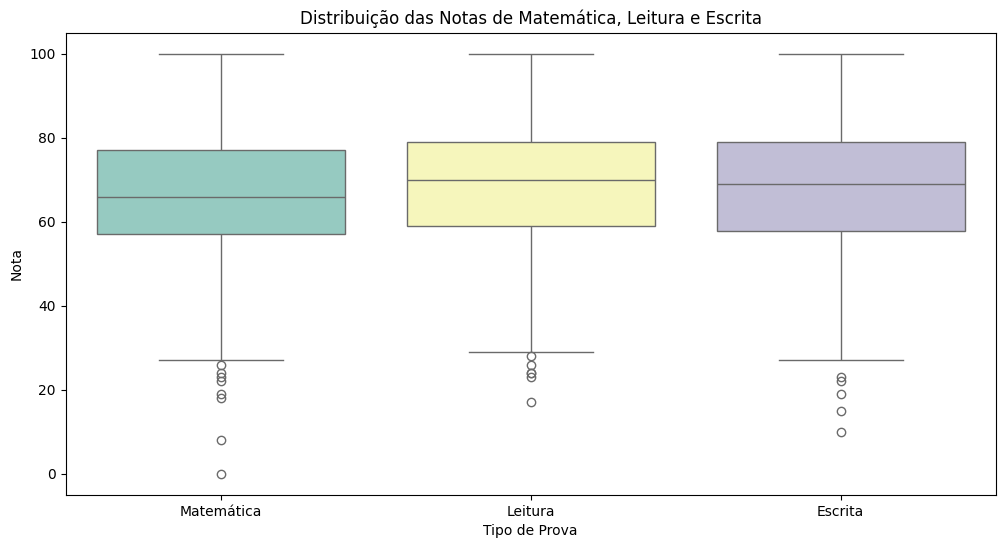

In [ ]:
# Criando um Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_notas_alunos[['nota na prova de matemática', 'nota na prova de leitura', 'nota na prova de escrita']], palette="Set3")

# Adicionando título e rótulos
plt.title('Distribuição das Notas de Matemática, Leitura e Escrita')
plt.xlabel('Tipo de Prova')
plt.ylabel('Nota')

# Ajustando os rótulos do eixo X
plt.xticks(ticks=[0, 1, 2], labels=['Matemática', 'Leitura', 'Escrita'])

# Exibindo o gráfico
plt.show()

# Criando o histograma

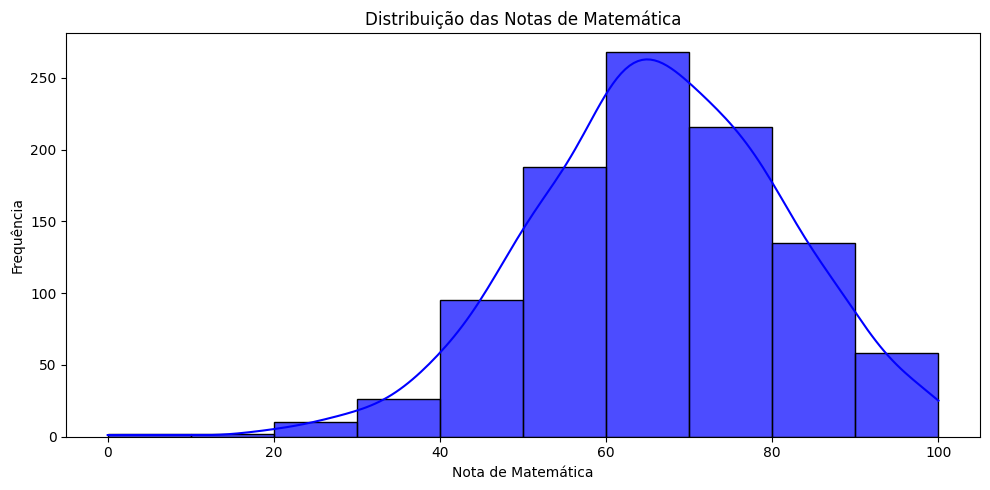

In [ ]:
# Histograma para Nota de Matemática
plt.figure(figsize=(10, 5))
sns.histplot(df_notas_alunos['nota na prova de matemática'], bins=10, kde=True, color='blue', alpha=0.7)
plt.title('Distribuição das Notas de Matemática')
plt.xlabel('Nota de Matemática')
plt.ylabel('Frequência')

# Ajustando o layout
plt.tight_layout()
plt.show()


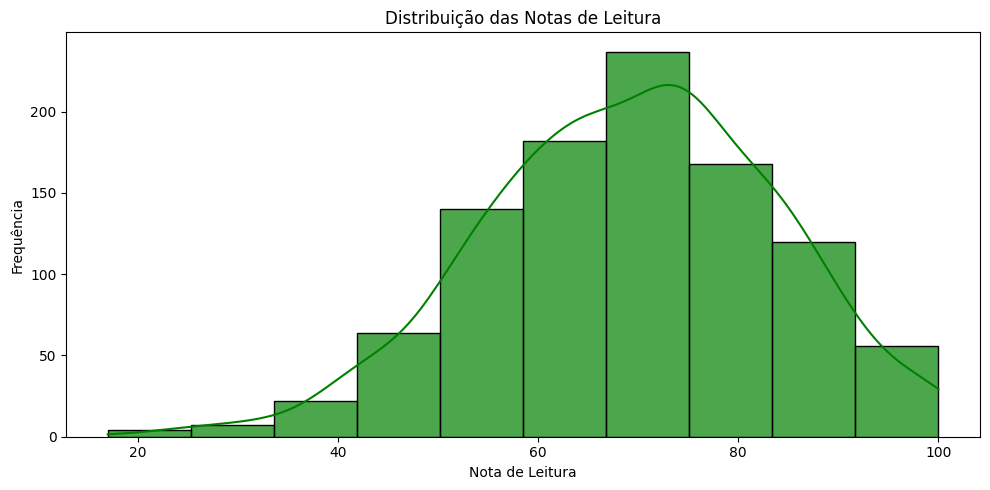

In [ ]:
# Histograma para Nota de Leitura
plt.figure(figsize=(10, 5))
sns.histplot(df_notas_alunos['nota na prova de leitura'], bins=10, kde=True, color='green', alpha=0.7)
plt.title('Distribuição das Notas de Leitura')
plt.xlabel('Nota de Leitura')
plt.ylabel('Frequência')

# Ajustando o layout
plt.tight_layout()
plt.show()

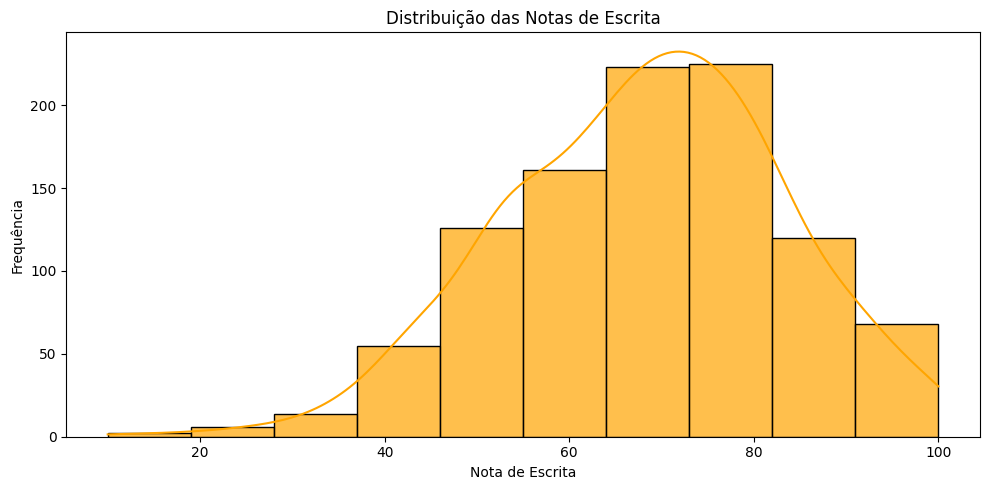

In [ ]:
# Histograma para Nota de Escrita
plt.figure(figsize=(10, 5))
sns.histplot(df_notas_alunos['nota na prova de escrita'], bins=10, kde=True, color='orange', alpha=0.7)
plt.title('Distribuição das Notas de Escrita')
plt.xlabel('Nota de Escrita')
plt.ylabel('Frequência')

# Ajustando o layout
plt.tight_layout()
plt.show()

#Outras análises

In [ ]:
df_notas_alunos['grau de escolaridade dos pais'].value_counts()

,count
grau de escolaridade dos pais,
some college,226
associate's degree,222
high school,196
some high school,179
bachelor's degree,118
master's degree,59


In [ ]:
df_notas_alunos['tipo de almoço'].value_counts()

,count
tipo de almoço,
standard,645
free/reduced,355


In [ ]:
df_notas_alunos['indica se fez curso preparatório'].value_counts()

,count
indica se fez curso preparatório,
none,642
completed,358
